In [1]:
#Analyse exploratoire des données et Preprocessing
import numpy as np 
import pandas as pd 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)

In [2]:
data_Musical=pd.read_csv('Musical_instruments_reviews.csv', sep=',', encoding='utf8')

In [3]:
data_Musical.head(10)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014"
5,A2A039TZMZHH9Y,B00004Y2UT,"Bill Lewey ""blewey""","[0, 0]",So good that I bought another one. Love the h...,5.0,The Best Cable,1356048000,"12 21, 2012"
6,A1UPZM995ZAH90,B00004Y2UT,Brian,"[0, 0]","I have used monster cables for years, and with...",5.0,Monster Standard 100 - 21' Instrument Cable,1390089600,"01 19, 2014"
7,AJNFQI3YR6XJ5,B00004Y2UT,"Fender Guy ""Rick""","[0, 0]",I now use this cable to run from the output of...,3.0,Didn't fit my 1996 Fender Strat...,1353024000,"11 16, 2012"
8,A3M1PLEYNDEYO8,B00004Y2UT,"G. Thomas ""Tom""","[0, 0]",Perfect for my Epiphone Sheraton II. Monster ...,5.0,Great cable,1215302400,"07 6, 2008"
9,AMNTZU1YQN1TH,B00004Y2UT,Kurt Robair,"[0, 0]",Monster makes the best cables and a lifetime w...,5.0,Best Instrument Cables On The Market,1389139200,"01 8, 2014"


In [4]:
data_Musical.isnull().sum()

reviewerID         0
asin               0
reviewerName      27
helpful            0
reviewText         7
overall            0
summary            0
unixReviewTime     0
reviewTime         0
dtype: int64

In [5]:
data_Musical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10261 entries, 0 to 10260
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviewerID      10261 non-null  object 
 1   asin            10261 non-null  object 
 2   reviewerName    10234 non-null  object 
 3   helpful         10261 non-null  object 
 4   reviewText      10254 non-null  object 
 5   overall         10261 non-null  float64
 6   summary         10261 non-null  object 
 7   unixReviewTime  10261 non-null  int64  
 8   reviewTime      10261 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 721.6+ KB


In [6]:
print(data_Musical.shape[0],'lignes',data_Musical.shape[1],'colonnes')

10261 lignes 9 colonnes


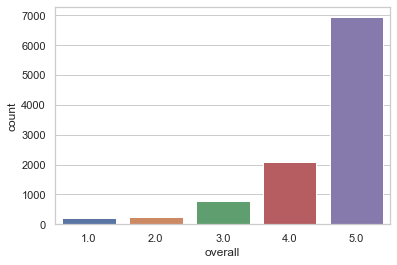

In [7]:
sns.countplot(x='overall',data=data_Musical)

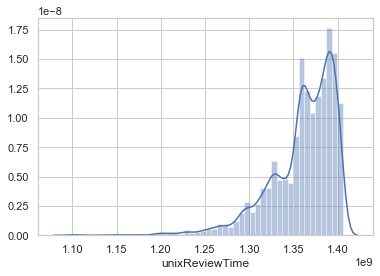

In [8]:
#2Afficher le distplotde la variable Glucose. Commenter
sns.distplot(data_Musical['unixReviewTime'])

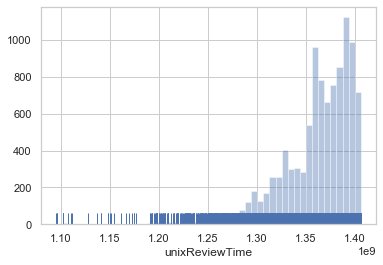

In [9]:
sns.distplot(data_Musical['unixReviewTime'], kde=False, rug=True)

In [10]:
data_Musical.describe(include='all')

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
count,10261,10261,10234,10261,10254,10261.000000,10261,1.026100e+04,10261
unique,1429,900,1397,269,10254,NaN,8852,NaN,1570
top,ADH0O8UVJOT10,B003VWJ2K8,Amazon Customer,"[0, 0]","I haven't had an issue with this cable yet, an...",NaN,Great,NaN,"01 22, 2013"
freq,42,163,66,6796,1,NaN,42,NaN,40
mean,NaN,NaN,NaN,NaN,NaN,4.488744,NaN,1.360606e+09,NaN
std,NaN,NaN,NaN,NaN,NaN,0.894642,NaN,3.779735e+07,NaN
min,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,1.095466e+09,NaN
25%,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,1.343434e+09,NaN
50%,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,1.368490e+09,NaN
75%,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,1.388966e+09,NaN


In [11]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


## prepocessing  des  données 

In [12]:
r2 = []
for i in range(len(data_Musical.helpful)):
    a = data_Musical.helpful[i]
    a = a[1:-1]
    result = [x.strip() for x in a.split(',')]
    r2.append(result)
    df = pd.DataFrame(r2, columns=["help1", "help2"])
print(df)

      help1 help2
0         0     0
1        13    14
2         1     1
3         0     0
4         0     0
...     ...   ...
10256     0     0
10257     0     0
10258     0     0
10259     0     0
10260     0     0

[10261 rows x 2 columns]


In [13]:
df.help1.astype("int")
df.help2.astype("int")

0         0
1        14
2         1
3         0
4         0
         ..
10256     0
10257     0
10258     0
10259     0
10260     0
Name: help2, Length: 10261, dtype: int32

In [14]:
data_Musical.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014"


In [15]:
data_Musical=data_Musical.drop(["reviewerName"],axis=1)

In [16]:
data_Musical.head()

,reviewerID,asin,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014"


In [17]:
df2=pd.concat([data_Musical,df])

In [18]:
df2.head(10)

,reviewerID,asin,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,help1,help2
0,A2IBPI20UZIR0U,1384719342,"[0, 0]","Not much to write about here, but it does exac...",5.0,good,1.393546e+09,"02 28, 2014",NaN,NaN
1,A14VAT5EAX3D9S,1384719342,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1.363392e+09,"03 16, 2013",NaN,NaN
2,A195EZSQDW3E21,1384719342,"[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1.377648e+09,"08 28, 2013",NaN,NaN
3,A2C00NNG1ZQQG2,1384719342,"[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1.392336e+09,"02 14, 2014",NaN,NaN
4,A94QU4C90B1AX,1384719342,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1.392941e+09,"02 21, 2014",NaN,NaN
5,A2A039TZMZHH9Y,B00004Y2UT,"[0, 0]",So good that I bought another one. Love the h...,5.0,The Best Cable,1.356048e+09,"12 21, 2012",NaN,NaN
6,A1UPZM995ZAH90,B00004Y2UT,"[0, 0]","I have used monster cables for years, and with...",5.0,Monster Standard 100 - 21' Instrument Cable,1.390090e+09,"01 19, 2014",NaN,NaN
7,AJNFQI3YR6XJ5,B00004Y2UT,"[0, 0]",I now use this cable to run from the output of...,3.0,Didn't fit my 1996 Fender Strat...,1.353024e+09,"11 16, 2012",NaN,NaN
8,A3M1PLEYNDEYO8,B00004Y2UT,"[0, 0]",Perfect for my Epiphone Sheraton II. Monster ...,5.0,Great cable,1.215302e+09,"07 6, 2008",NaN,NaN
9,AMNTZU1YQN1TH,B00004Y2UT,"[0, 0]",Monster makes the best cables and a lifetime w...,5.0,Best Instrument Cables On The Market,1.389139e+09,"01 8, 2014",NaN,NaN


In [21]:
df2.dtypes

reviewerID         object
asin               object
helpful            object
reviewText         object
overall           float64
summary            object
unixReviewTime    float64
reviewTime         object
help1              object
help2              object
dtype: object

In [22]:
df.dtypes

help1    object
help2    object
dtype: object

In [23]:
df3 = pd.concat([data_Musical, df], axis=1, sort=False)

In [24]:
df3

,reviewerID,asin,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,help1,help2
0,A2IBPI20UZIR0U,1384719342,"[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014",0,0
1,A14VAT5EAX3D9S,1384719342,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013",13,14
2,A195EZSQDW3E21,1384719342,"[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013",1,1
3,A2C00NNG1ZQQG2,1384719342,"[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014",0,0
4,A94QU4C90B1AX,1384719342,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014",0,0
...,...,...,...,...,...,...,...,...,...,...
10256,A14B2YH83ZXMPP,B00JBIVXGC,"[0, 0]","Great, just as expected. Thank to all.",5.0,Five Stars,1405814400,"07 20, 2014",0,0
10257,A1RPTVW5VEOSI,B00JBIVXGC,"[0, 0]",I've been thinking about trying the Nanoweb st...,5.0,"Long life, and for some players, a good econom...",1404259200,"07 2, 2014",0,0
10258,AWCJ12KBO5VII,B00JBIVXGC,"[0, 0]",I have tried coated strings in the past ( incl...,4.0,Good for coated.,1405987200,"07 22, 2014",0,0
10259,A2Z7S8B5U4PAKJ,B00JBIVXGC,"[0, 0]","Well, MADE by Elixir and DEVELOPED with Taylor...",4.0,Taylor Made,1404172800,"07 1, 2014",0,0


In [25]:
df3 = df3.drop(["helpful"], axis=1)

In [26]:
df3

,reviewerID,asin,reviewText,overall,summary,unixReviewTime,reviewTime,help1,help2
0,A2IBPI20UZIR0U,1384719342,"Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014",0,0
1,A14VAT5EAX3D9S,1384719342,The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013",13,14
2,A195EZSQDW3E21,1384719342,The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013",1,1
3,A2C00NNG1ZQQG2,1384719342,Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014",0,0
4,A94QU4C90B1AX,1384719342,This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014",0,0
...,...,...,...,...,...,...,...,...,...
10256,A14B2YH83ZXMPP,B00JBIVXGC,"Great, just as expected. Thank to all.",5.0,Five Stars,1405814400,"07 20, 2014",0,0
10257,A1RPTVW5VEOSI,B00JBIVXGC,I've been thinking about trying the Nanoweb st...,5.0,"Long life, and for some players, a good econom...",1404259200,"07 2, 2014",0,0
10258,AWCJ12KBO5VII,B00JBIVXGC,I have tried coated strings in the past ( incl...,4.0,Good for coated.,1405987200,"07 22, 2014",0,0
10259,A2Z7S8B5U4PAKJ,B00JBIVXGC,"Well, MADE by Elixir and DEVELOPED with Taylor...",4.0,Taylor Made,1404172800,"07 1, 2014",0,0


In [ ]:
# Text pre-processing (stemming)
"""removes punctuation, stopwords, and returns a list of the remaining words, or tokens"""
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')
import string
def text_process(text):
    stemmer = WordNetLemmatizer()
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join([i for i in nopunc if not i.isdigit()])
    nopunc =  [word.lower() for word in nopunc.split() if word not in stopwords.words('english')]
    return [stemmer.lemmatize(word) for word in nopunc]
#testing the function with a sample text#
df3["reviewText1"] = df3.reviewText.apply(text_process)
df3["summary1"] = df3.summary.apply(text_process)
df3